In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
#import urllib2

import matplotlib.pyplot as plt
import matplotlib.dates as dates
import scipy
import scipy.stats as sp
import scipy.optimize as op
import statsmodels.api as sm
from pandas.stats.api import ols
from datetime import datetime, date, timedelta
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.pyplot import cm 
import platform
import sys
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

In [4]:
import wellapplication as wa

In [5]:
print("Operating System " + platform.system() + " " + platform.release())
print("Python Version " + str(sys.version))
print("Pandas Version " + str(pd.__version__))
print("Numpy Version " + str(np.__version__))
print("Matplotlib Version " + str(matplotlib.__version__))
print("Well Application Version " + str(wa.__version__))
print("Scipy Version " +str(scipy.__version__))

Operating System Windows 7
Python Version 3.5.3 |Continuum Analytics, Inc.| (default, May 15 2017, 10:43:23) [MSC v.1900 64 bit (AMD64)]
Pandas Version 0.19.2
Numpy Version 1.11.2
Matplotlib Version 1.5.3
Well Application Version 0.4.26
Scipy Version 0.18.1


In [4]:
USGS = wa.usgs()

TypeError: 'module' object is not callable

Set File Locations

In [5]:
fileLocation = 'H:/Google Drive/WORK/Round Valley/Data/Hydrology_Data/URVH/'
transData = 'transducer_baro_input.xlsx'

# Import Transducer data and fix dates

In [25]:
baro = pd.read_csv(fileLocation + "climate/UCC_awos_K36U_2016_10_05_1475672447.csv", skiprows=12, index_col=0, parse_dates=True,na_values=['M','S'])

In [26]:
baro.columns

Index([u'Wind Speed', u'Wind Gust', u'Wind Direction', u'Visibility',
       u'Precipitation', u'Precipitation Type', u'Temperature', u'Dew Point',
       u'Altimeter'],
      dtype='object')

In [27]:
baro['BP_ft'] = baro['Altimeter'].apply(lambda x: float(x)*1.13,1)

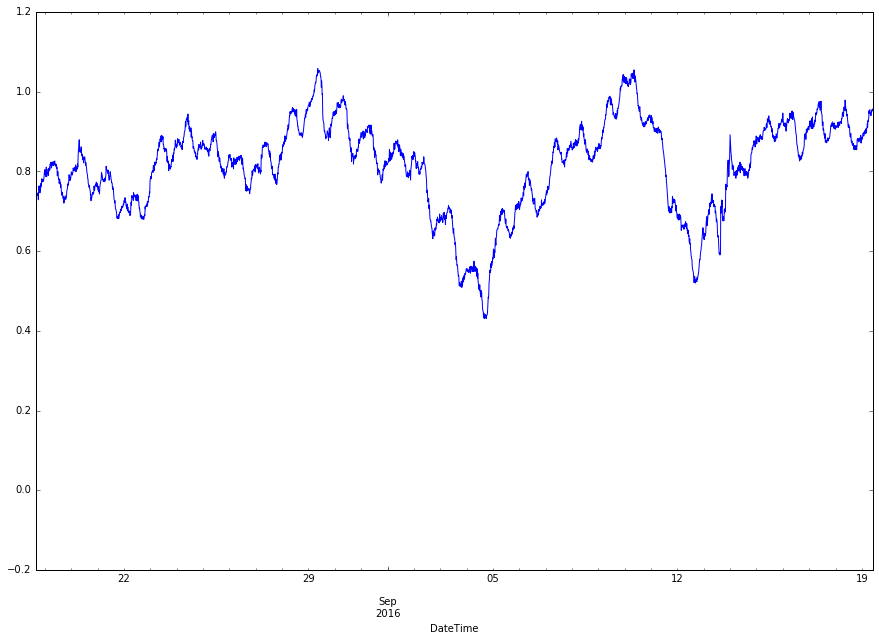

In [16]:
LH = wa.transport.new_xle_imp(fileLocation + '20160919_LittleHobble.xle')
LH['Level'].plot()


In [290]:
NF = pd.read_excel(fileLocation+transData,'NorthFork',skiprows=13)
MF = pd.read_excel(fileLocation+transData,'MiddleFork',skiprows=13)
SC = pd.read_excel(fileLocation+transData,'SpringCreek',skiprows=13)
NB = pd.read_excel(fileLocation+transData,'NBSouthFork',skiprows=13)
SB = pd.read_excel(fileLocation+transData,'SBSouthFork',skiprows=13)

In [291]:
# Combine date and time columns
NF['datetime'] = NF[['Date','Time']].apply(lambda x: pd.datetime(x[0].year,x[0].month, 
                                                                 x[0].day,x[1].hour,x[1].minute,x[1].second),1)
MF['datetime'] = MF[['Date','Time']].apply(lambda x: pd.datetime(x[0].year,x[0].month, 
                                                                 x[0].day,x[1].hour,x[1].minute,x[1].second),1)
SC['datetime'] = SC[['Date','Time']].apply(lambda x: pd.datetime(x[0].year,x[0].month, 
                                                                 x[0].day,x[1].hour,x[1].minute,x[1].second),1)
NB['datetime'] = NB[['Date','Time']].apply(lambda x: pd.datetime(x[0].year,x[0].month, 
                                                                 x[0].day,x[1].hour,x[1].minute,x[1].second),1)
SB['datetime'] = SB[['Date','Time']].apply(lambda x: pd.datetime(x[0].year,x[0].month, 
                                                                 x[0].day,x[1].hour,x[1].minute,x[1].second),1)

In [292]:
# Set datetime index
NF.set_index(['datetime'],inplace=True)
MF.set_index(['datetime'],inplace=True)
SC.set_index(['datetime'],inplace=True)
NB.set_index(['datetime'],inplace=True)
SB.set_index(['datetime'],inplace=True)

In [293]:
# Drop separate date and time columns
NF.drop(['Date','Time'],axis=1,inplace=True)
MF.drop(['Date','Time'],axis=1,inplace=True)
SC.drop(['Date','Time'],axis=1,inplace=True)
NB.drop(['Date','Time'],axis=1,inplace=True)
SB.drop(['Date','Time'],axis=1,inplace=True)

In [294]:
NF.drop(['TEMPERATURE'],axis=1,inplace=True)
MF.drop(['Temperature'],axis=1,inplace=True)
SC.drop(['TEMPERATURE'],axis=1,inplace=True)
NB.drop(['TEMPERATURE'],axis=1,inplace=True)
SB.drop(['TEMPERATURE'],axis=1,inplace=True)

# Fix Jumps in Raw Data

In [295]:
print('SB')
SB2 = SB.copy(deep=True)
SBjf = wa.transport.jumpfix(SB2,'LEVEL',threashold=0.4)
print('NB')
NB2 = NB.copy(deep=True)
NBjf = wa.transport.jumpfix(NB2,'LEVEL',threashold=0.4)
print('NF')
NF2 = NF.copy(deep=True)
NFjf = wa.transport.jumpfix(NF2,'LEVEL',threashold=0.4)
print('MF')
MF2 = MF.copy(deep=True)
MFjf = wa.transport.jumpfix(MF2,'Level',threashold=0.4)
print('SC')
SC2 = SC.copy(deep=True)
SCjf = wa.transport.jumpfix(SC2,'LEVEL',threashold=0.4)

SB
                      LEVEL  deltaLEVEL   cumul
datetime                                       
2015-09-08 10:23:37  0.2365     -0.5443 -0.5443
2015-09-08 10:38:37  0.7279      0.4914 -0.0529
2015-11-13 13:38:37  0.2072     -0.5995 -0.6524
2015-11-13 14:08:37  0.7752      0.5360 -0.1164
2016-03-01 17:38:37  0.6726     -0.5874 -0.7038
2016-03-04 13:08:37  0.0856     -0.7003 -1.4041
2016-03-04 13:23:37  1.2475      1.1619 -0.2422
2016-03-21 14:38:37 -0.1835     -1.2832 -1.5254
2016-03-21 14:53:37  0.8457      1.0292 -0.4962
NB
                      LEVEL  deltaLEVEL   cumul
datetime                                       
2016-03-21 15:35:33 -0.1718     -1.0565 -1.0565
2016-03-21 16:05:33  0.6448      0.7931 -0.2634
2016-06-20 19:05:33  0.3194     -0.5418 -0.8052
NF
Empty DataFrame
Columns: [LEVEL, deltaLEVEL, cumul]
Index: []
MF
                     Level  deltaLevel  cumul
datetime                                     
2015-10-07 16:39:24  0.951      -0.579 -0.579
2015-10-10 14:39:24 

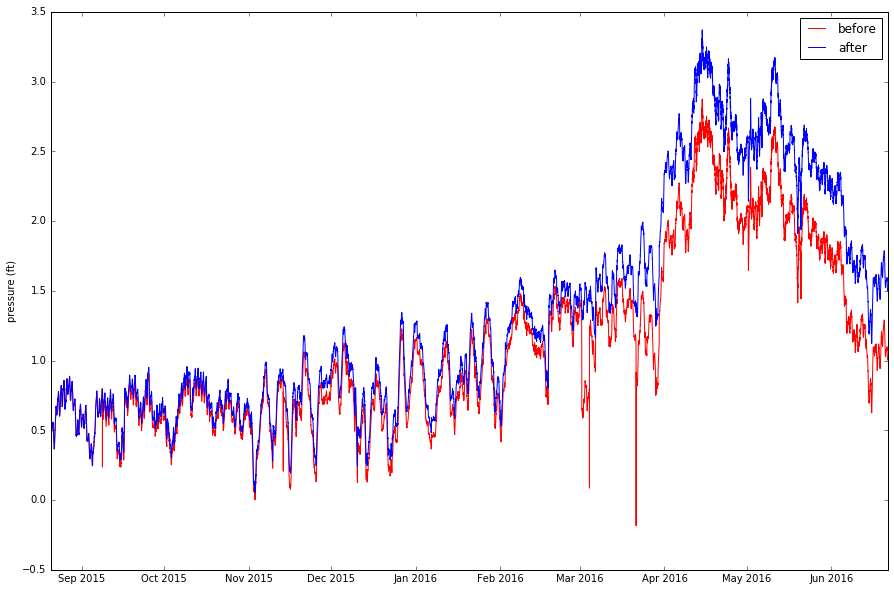

In [296]:
x1 = SB.index
y1 = SB['LEVEL']

x2 = SBjf.index
y2 = SBjf['LEVEL']

plt.figure()
plt.plot(x1,y1, color='red', label='before')
plt.plot(x2,y2, color='blue', label='after')
plt.legend()
plt.ylabel('pressure (ft)')

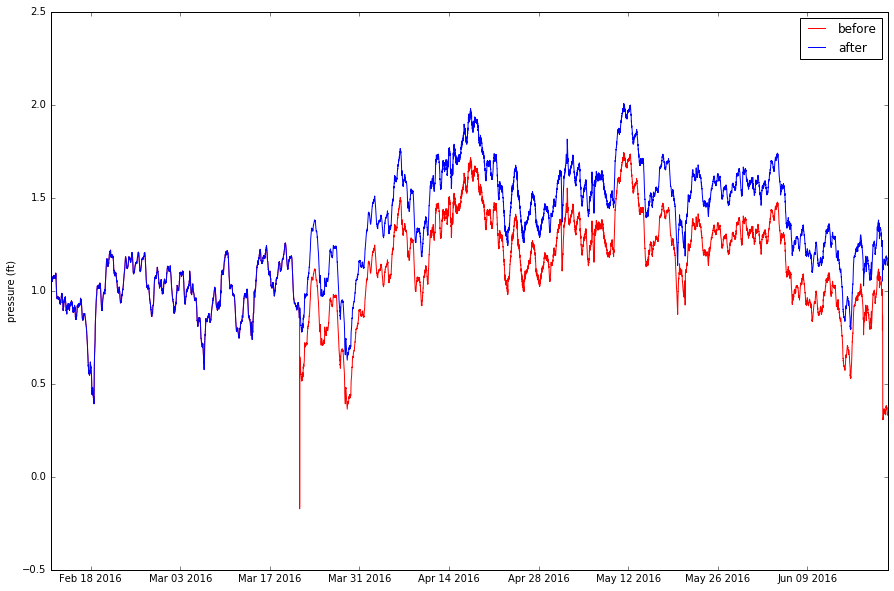

In [297]:
x1 = NB.index

y1 = NB['LEVEL']

x2 = NBjf.index
y2 = NBjf['LEVEL']

plt.figure()
plt.plot(x1,y1, color='red', label='before')
plt.plot(x2,y2, color='blue', label='after')
plt.legend()
plt.ylabel('pressure (ft)')

# Import Manual Data

In [6]:
float(None)

TypeError: float() argument must be a string or a number, not 'NoneType'

# Import Baro Data

Get Baro Data From MEZO West Using API request

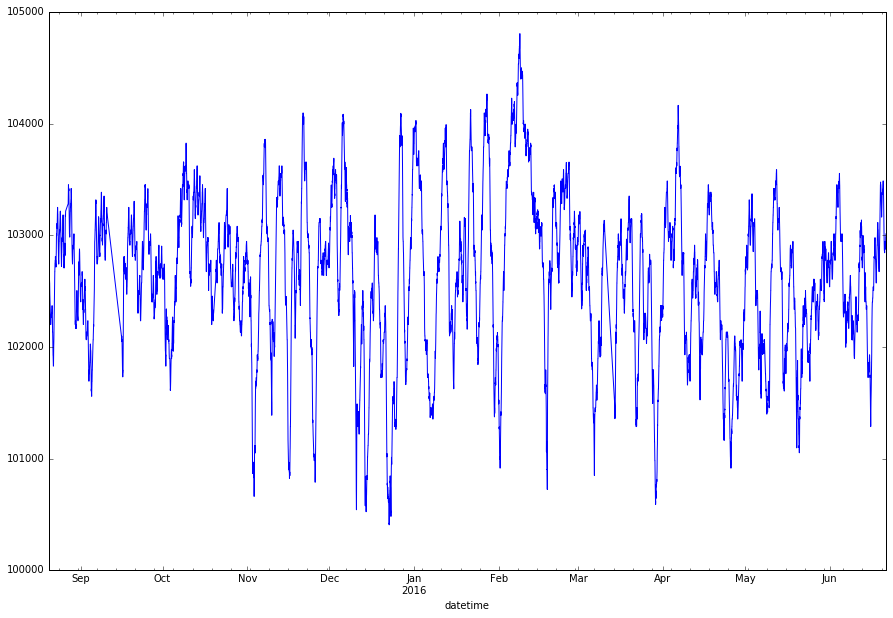

In [7]:
token = "1ab92e63dd924c6189e6d5e1015c2645"
html = 'https://api.mesowest.net/v2/stations/timeseries?token='+token+'&stid=C8844&state=ut&start=201508201100&end=201606211500&units=pres|mb&output=csv'
baro = pd.read_csv(html,skiprows=8,usecols=[1,2,15],index_col=0,parse_dates=True,names=['datetime','pressure_pascals','precip_mm'])

barores = baro.resample('1min').mean()
barores = barores.interpolate(how='time')
barores = barores.resample('15min').mean()
barores['pressure_pascals'].plot()

# Resample and Merge Data

In [317]:
NFres = NF.resample('1min').mean()
NFres = NFres.interpolate(how='time')
NFres = NFres.resample('15min').mean()

MFres = MFjf.resample('1min').mean()
MFres = MFres.interpolate(how='time')
MFres = MFres.resample('15min').mean()

SCres = SC.resample('1min').mean()
SCres = SCres.interpolate(how='time')
SCres = SCres.resample('15min').mean()

NBres = NBjf.resample('1min').mean()
NBres = NBres.interpolate(how='time')
NBres = NBres.resample('15min').mean()

SBres = SBjf.resample('1min').mean()
SBres = SBres.interpolate(how='time')
SBres = SBres.resample('15min').mean()

In [318]:
NFres['North Fk (ft)'] = NFres['LEVEL'] - 27
NFres.drop(['LEVEL'],axis=1,inplace=1)
MFres['Middle Fk (ft)'] = MFres['Level'] + 1
MFres.drop(['Level',u'deltaLevel', u'newVal'],axis=1,inplace=1)
SCres['Spring Creek (ft)'] = SCres['LEVEL'] + 1
SCres.drop(['LEVEL'],axis=1,inplace=1)
NBres['NB South Fk (ft)'] = NBres['LEVEL'] + 1
NBres.drop(['LEVEL',u'deltaLEVEL', u'newVal'],axis=1,inplace=1)
SBres['SB South Fk (ft)'] = SBres['LEVEL'] + 1
SBres.drop(['LEVEL', u'deltaLEVEL', u'newVal'],axis=1,inplace=1)

In [319]:
ALL = pd.concat([SBres,NBres,SCres,MFres,NFres,barores],axis=1)

In [320]:
ALL['baro (ft)'] = ALL['pressure_pascals']*0.000334562
ALL['baro (ft)'] = ALL['baro (ft)'].apply(lambda x: x - ALL['baro (ft)'].min(),1)
ALL['d_baro_ft'] = ALL['baro (ft)'].diff()
ALL.drop(['pressure_pascals'],axis=1,inplace=True)

In [321]:
flow = pd.read_excel(fileLocation+transData,'flow')
flow['datetime'] = flow[['date','time start']].apply(lambda x: pd.datetime(x[0].year,x[0].month,
                                                                     x[0].day,x[1].hour,x[1].minute,
                                                                     x[1].second),1)

flow.set_index(['datetime'],inplace=True)

for i in list(flow.columns):
    if i in ['CFS','Fork', 'staff gage']:
        pass
    else:
        flow.drop([i],axis=1,inplace=True)

(47.857713245999648, 7.1422465472884866, 0.89192455965712836)
(74.684891834741009, 5.0509873156461289, 0.87264144230328666)
(-47.344858800958995, 7.593336434947096, 0.27853465503924912)
(43.827994992193823, -5.6085863818087311, 0.88777477579513786)
(25.458877297575075, 60.672284943981417, 0.46218638961709463)


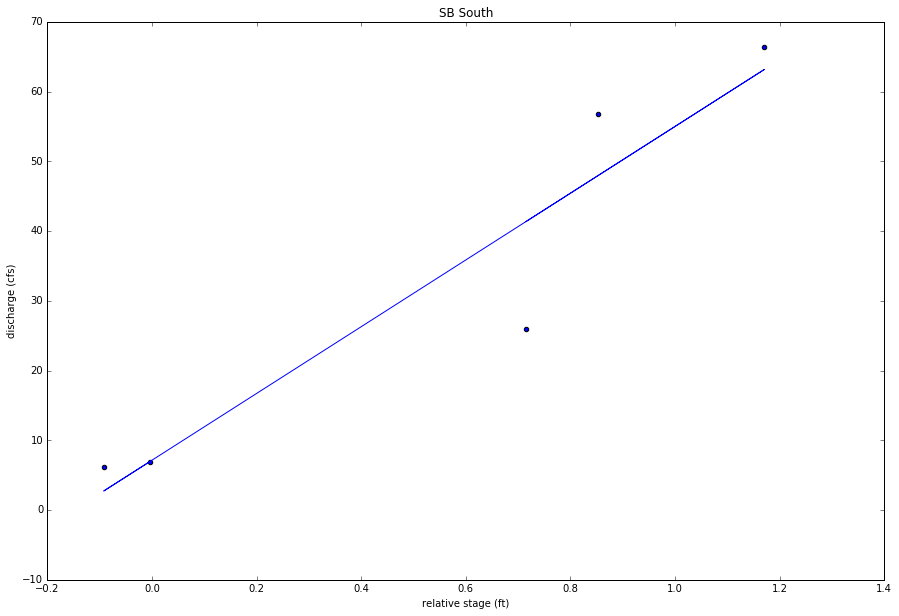

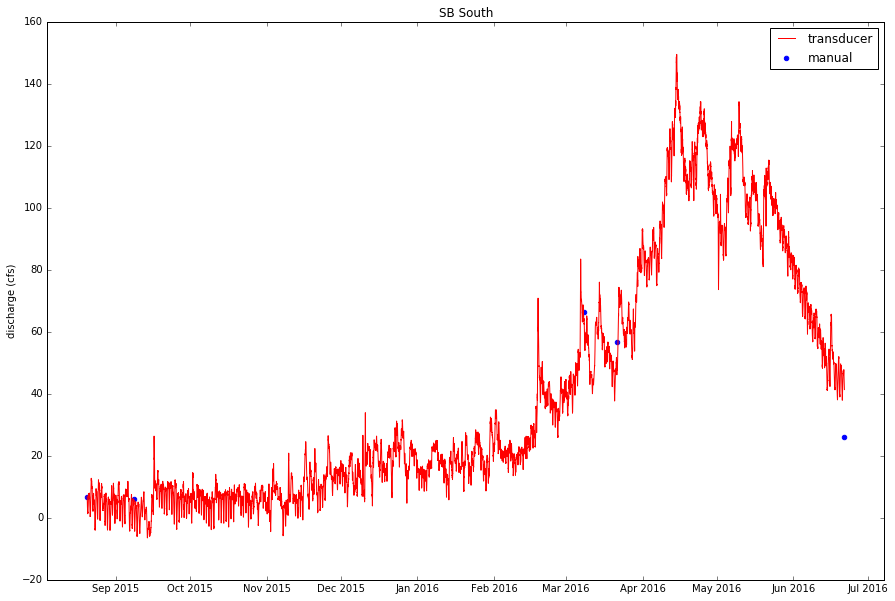

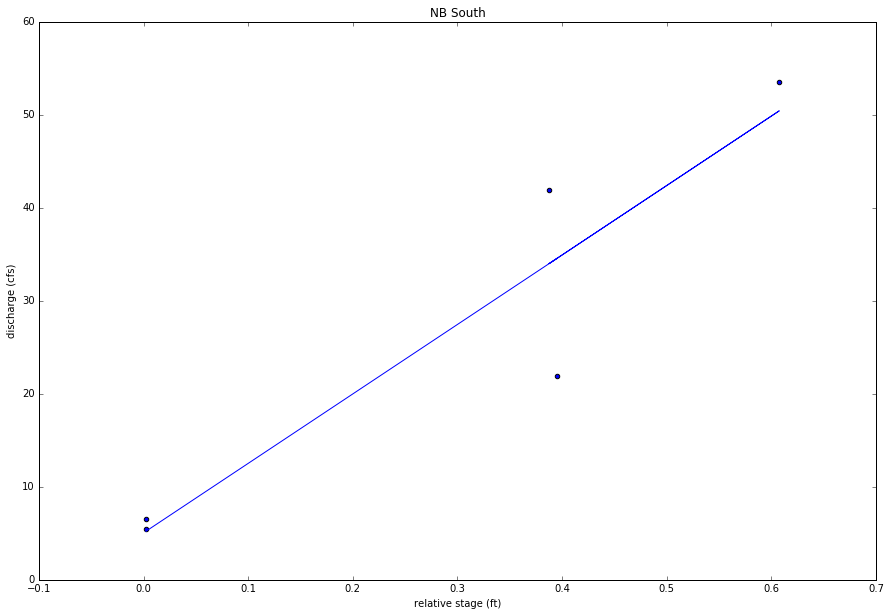

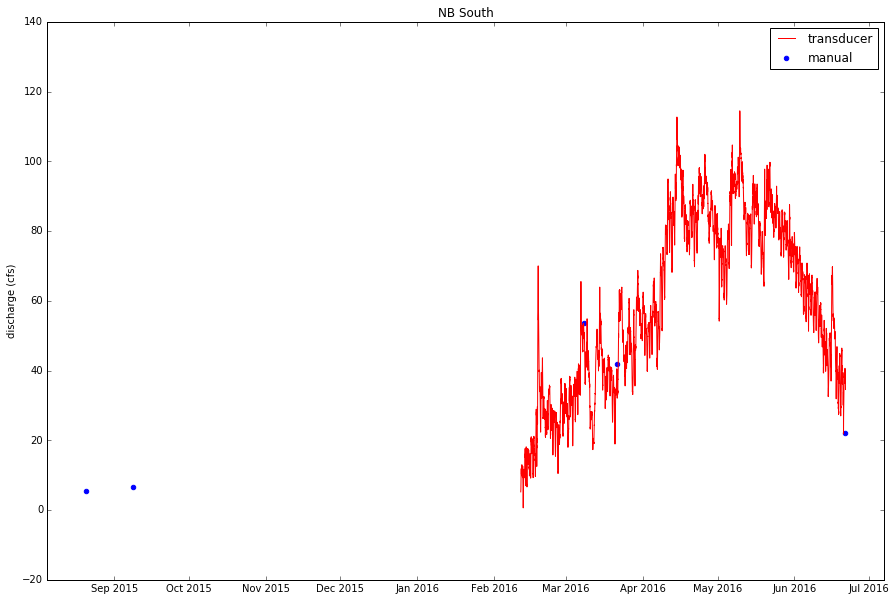

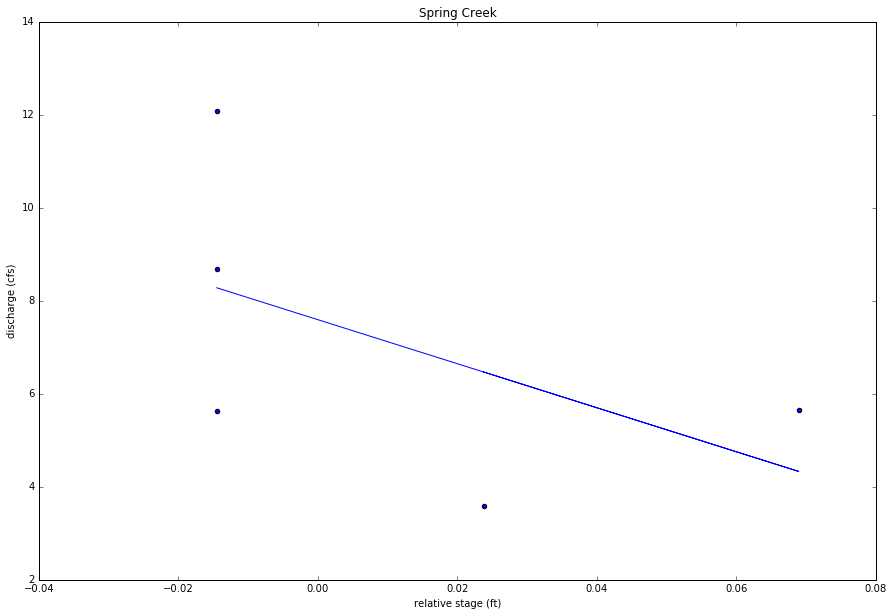

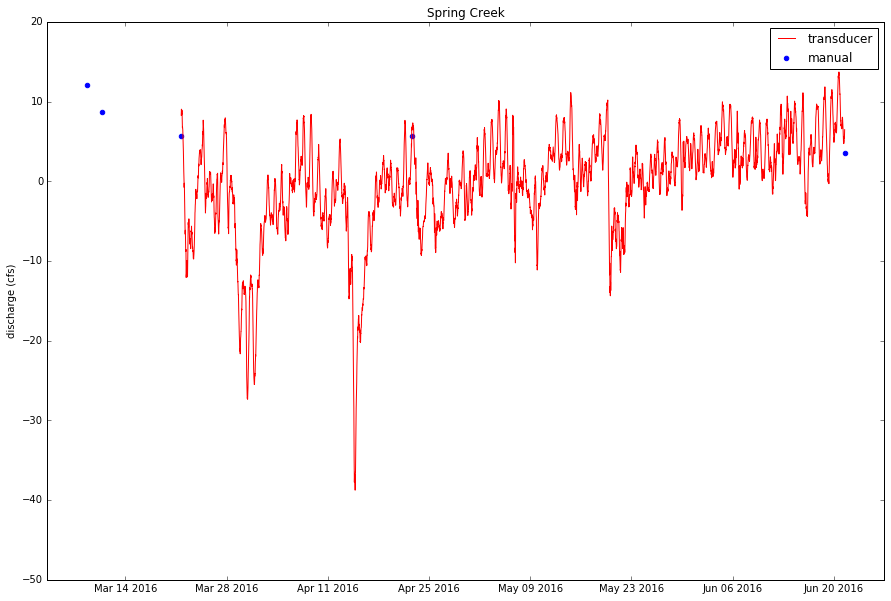

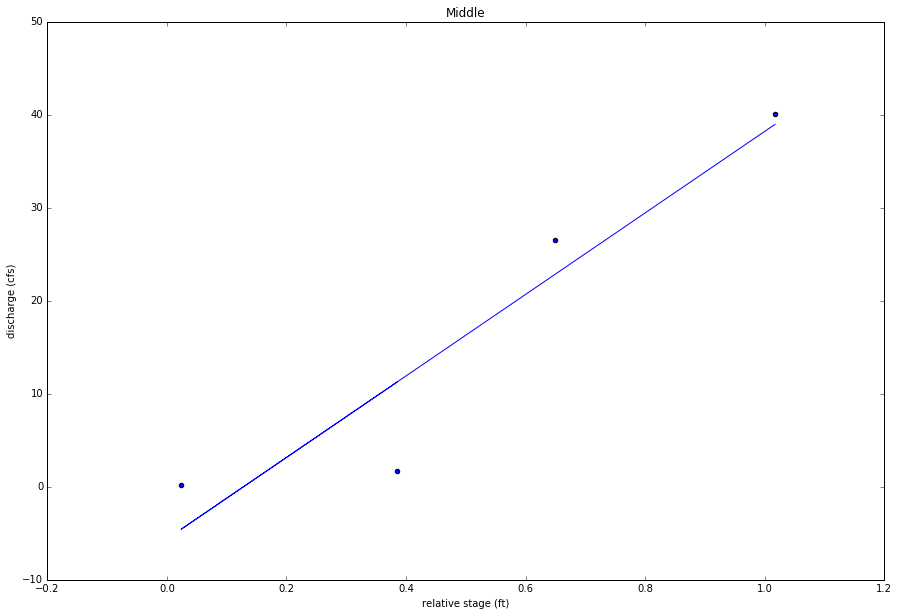

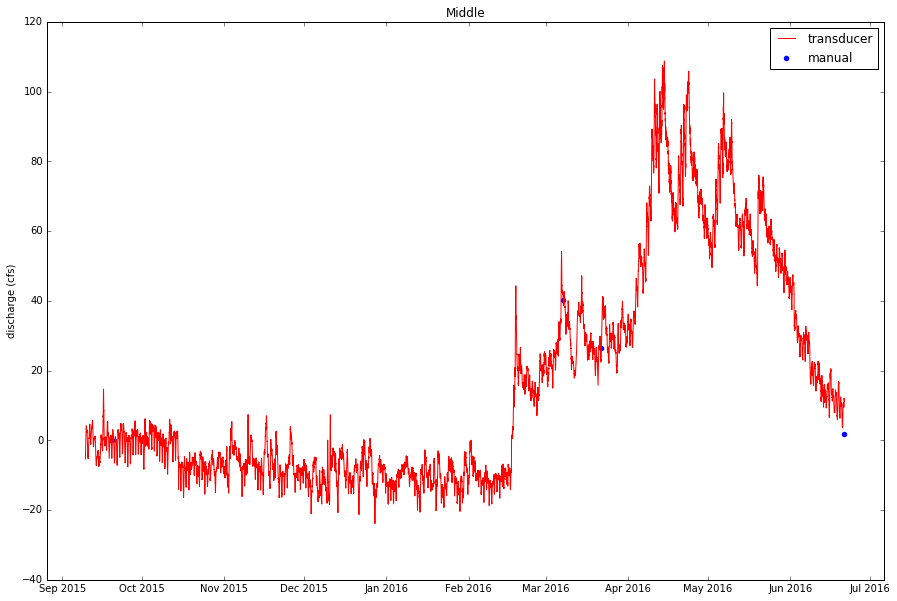

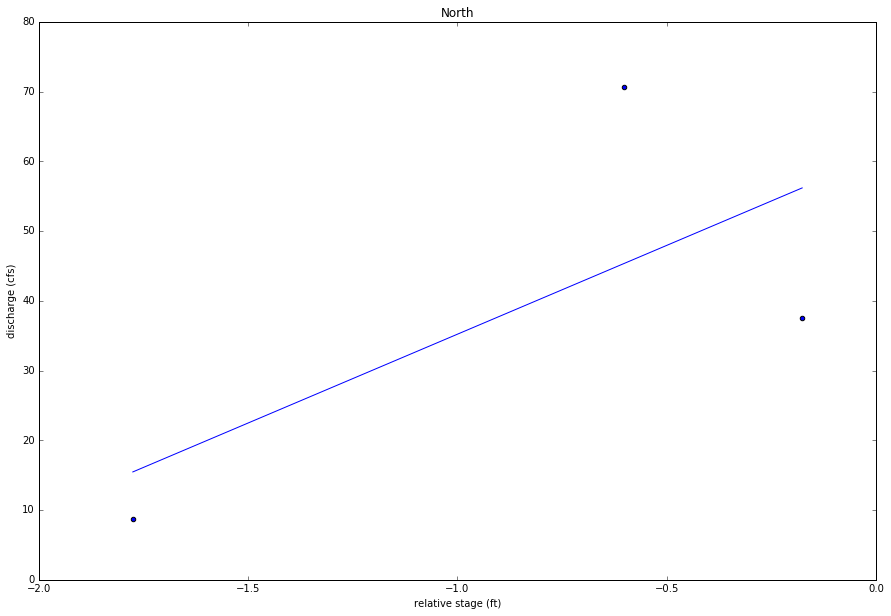

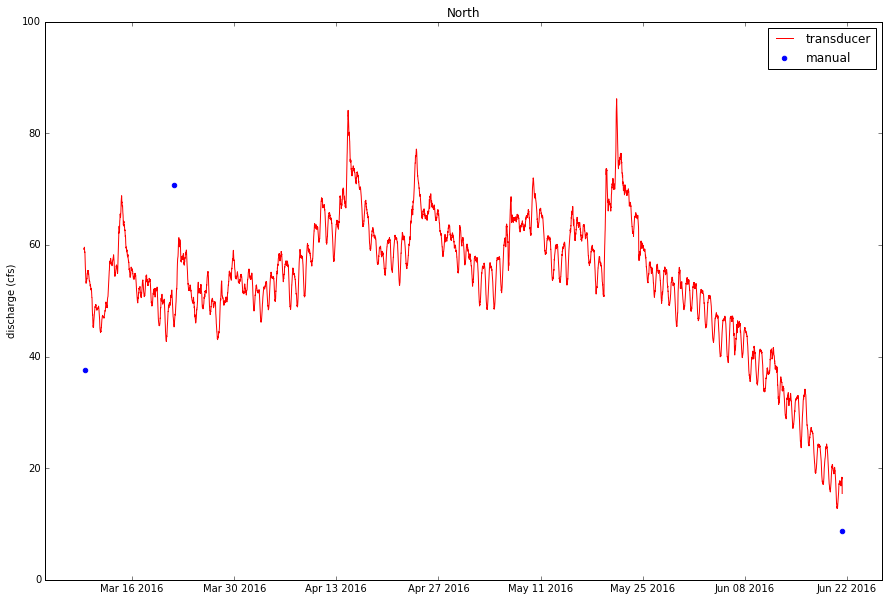

In [322]:
from scipy import stats

Qcolumns = ['SB South Fk (ft)','NB South Fk (ft)','Spring Creek (ft)','Middle Fk (ft)','North Fk (ft)']
forks = [ u'SB South', u'NB South', u'Spring Creek', u'Middle', u'North']

for i in range(len(Qcolumns)):
    ALL['d'+ Qcolumns[i]] = ALL[Qcolumns[i]].diff()
    ALL['adjusted '+ Qcolumns[i]] = ALL[['d'+ Qcolumns[i],'d_baro_ft']].apply(lambda x: x[0]-x[1],1).cumsum()
    ALL.drop(['d'+ Qcolumns[i]],axis=1,inplace=True)
    
    AllSub = ALL['adjusted ' + Qcolumns[i]].to_frame()
    AllSub.dropna(inplace=True)
    
    MFflow = flow[flow.Fork==forks[i]]
    MFQ = []
    for j in range(len(MFflow)):
        MFQ.append(wa.transport.fcl(AllSub, MFflow.index[j])['adjusted ' + Qcolumns[i]])

    x1 = MFQ
    y1 = MFflow.CFS

    plt.figure()
    plt.scatter(x1,y1)

    slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y1)
    print(slope,intercept,r_value*r_value)
    y0 = [k*slope + intercept for k in x1]
    plt.plot(x1,y0)
    plt.xlabel('relative stage (ft)')
    plt.ylabel('discharge (cfs)')
    plt.title(forks[i])
    plt.savefig(fileLocation+forks[i]+'_relationship.pdf')

    ALL[forks[i] + ' (cfs)'] = ALL['adjusted ' +Qcolumns[i]].apply(lambda x: x*slope + intercept, 1)
    
    x = ALL.index
    y = ALL[forks[i] + ' (cfs)']

    x1 = MFflow.index
    y1 = MFflow.CFS

    plt.figure()
    plt.plot(x,y,color='red',label='transducer')
    plt.scatter(x1,y1,color='blue',label='manual')
    plt.legend(scatterpoints=1)
    plt.ylabel('discharge (cfs)')
    plt.title(forks[i])
    plt.savefig(fileLocation+forks[i]+"_hydrograph.pdf")
    
ALL.drop(['d_baro_ft'],axis=1,inplace=True)


In [323]:
ALL.to_csv(fileLocation+'processed_data.csv')